In [21]:
# Importamos las librerias

import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from kmodes.kmodes import KModes

%matplotlib inline
plt.rcParams['figure.figsize'] = [9.5, 6]

In [22]:
# Obtenemos lod datos del archivo de ventas de bibicletas
df = pd.read_csv('compradores_clean.csv')
df.head()

,uid,id,phone,email,first_name,last_name,gender,birthday,location,hometown,relationship_status,date,quantity,price,brand,category,type,detail
0,100034704393808,AG2004022,XXXXXXX7647,NaN,Andres,Cuasquen,male,NaN,Tulcan,Tulcan,Single,2021-06-01,2,259.0,Elite,Accesorios,Ciclosimuladores,CICLOSIMULADOR NOVO FORCE
1,100010415584337,AG2004006,XXXXXXX2501,NaN,Nelson,Nazamuez,male,NaN,Tulcan,Tulcan,NaN,2021-06-01,1,265.0,Eagle,Bicicletas,Paseo,Eagle City Bike Aro 700 Cuadro Aluminio
2,100001924592151,AG2004001,XXXXXXX8732,NaN,Jhon,Caino,male,NaN,Tulcan,Tulcan,NaN,2021-06-01,2,16.0,Shimano,Accesorios,Discos,Disco SHIMANO TX SM-RT10
3,100010415584337,AG2004024,XXXXXXX2501,NaN,Nelson,Nazamuez,male,NaN,Tulcan,Tulcan,NaN,2021-06-01,2,75.0,Lazer,Casco,Sport,CASCO JACKAL /MIPS
4,100000396260059,AG2004015,XXXXXXX4510,NaN,Cristofer,Rodriguez Portilla,male,06/10/1986,Tulcan,Tulcan,Married,2021-06-01,1,475.0,Giant,Bicicletas,Montanera,Talon 4 Aro 29 Aluminio


In [23]:
df['priceBins'] = pd.cut(df['price'],10)
df['priceBins'] = df['priceBins'].astype('str')
df.drop(['uid', 'id','phone','email','first_name','last_name','birthday','date','location','hometown','detail','price'], axis=1, inplace=True)
df.dtypes

gender                 object
relationship_status    object
quantity                int64
brand                  object
category               object
type                   object
priceBins              object
dtype: object

In [24]:
# Obtenemos la matriz intercambiando numeros en lugar de strings
df1 = pd.DataFrame()
for col in df:
    if is_string_dtype(df[col]): # si es que la columna es de strings
        print(col, end = '\t')
        uniqueVals = df[col].unique() # obtener cuantos strings diferentes hay
        mymap = dict(zip(uniqueVals, range(len(uniqueVals)))) # crear un diccionario con los elementos
        print(mymap)
        df1[col] = df[col].replace(mymap) # Aplicar el diccionario a la columna
    else:
        df1[col] = df[col]
df1.describe(include='all')

gender	{'male': 0, 'female': 1, nan: 2}
relationship_status	{'Single': 0, nan: 1, 'Married': 2, 'Engaged': 3, 'Separated': 4, 'In a relationship': 5, "It's complicated": 6, 'In a civil union': 7, 'Divorced': 8}
brand	{'Elite': 0, 'Eagle': 1, 'Shimano': 2, 'Lazer': 3, 'Giant': 4, 'Pro': 5, 'Twitter': 6}
category	{'Accesorios': 0, 'Bicicletas': 1, 'Casco': 2}
type	{'Ciclosimuladores': 0, 'Paseo': 1, 'Discos': 2, 'Sport': 3, 'Montanera': 4, 'Ruta': 5, 'Timones': 6, 'Gafas': 7, 'Monturas': 8, 'TT/TRI/TRACK': 9, 'Montanera ': 10, 'Grips': 11, 'Zapatillas': 12}
priceBins	{'(142.2, 276.4]': 0, '(6.658, 142.2]': 1, '(410.6, 544.8]': 2, '(1215.8, 1350.0]': 3, '(276.4, 410.6]': 4, '(947.4, 1081.6]': 5, '(813.2, 947.4]': 6, '(544.8, 679.0]': 7}


,gender,relationship_status,quantity,brand,category,type,priceBins
count,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000
mean,0.519369,1.213514,1.177928,3.351351,0.612162,4.782432,1.868018
std,0.595978,1.145321,0.382538,1.955562,0.685612,3.347658,1.534980
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000
50%,0.000000,1.000000,1.000000,3.000000,0.000000,4.000000,1.000000
75%,1.000000,1.000000,1.000000,5.000000,1.000000,7.000000,3.000000
max,2.000000,8.000000,2.000000,6.000000,2.000000,12.000000,7.000000


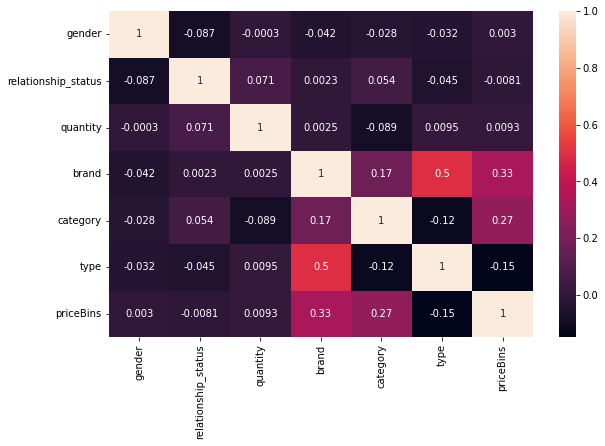

In [25]:
# hacemos la matriz de correlacion
corrMatrix = df1.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [26]:
# Hacemos una copia del df
dfCopy = df1.copy()

In [27]:
# Probamos el init Cao
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df1)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 7821.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 148, cost: 6018.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 235, cost: 5316.0
Run 1, iteration: 2/100, moves: 0, cost: 5316.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 195, cost: 4868.0
Run 1, iteration: 2/100, moves: 160, cost: 4831.0
Run 1, iteration: 3/100, moves: 0, cost: 4831.0


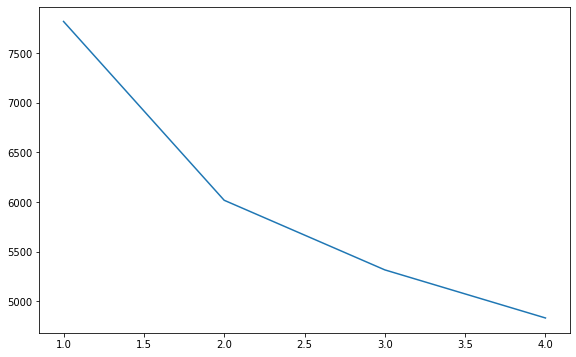

In [28]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [29]:
# Probamos el init Huang
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1)
    kmode.fit_predict(df1)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 7821.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 839, cost: 6433.0
Run 1, iteration: 2/100, moves: 479, cost: 6230.0
Run 1, iteration: 3/100, moves: 6, cost: 6230.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 395, cost: 5271.0
Run 1, iteration: 2/100, moves: 9, cost: 5271.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 475, cost: 4612.0
Run 1, iteration: 2/100, moves: 3, cost: 4612.0


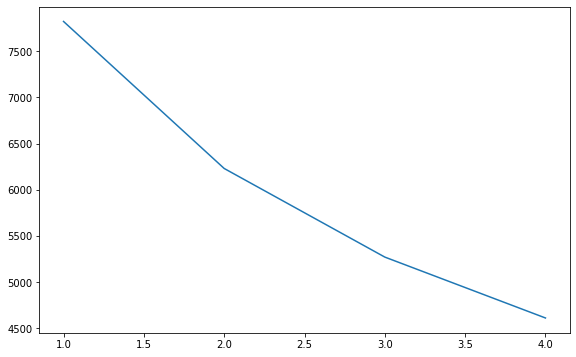

In [30]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [31]:
# determinar numero de clustersg
clust = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1)
    pred = kmode.fit_predict(df1)
    clust.append(pred)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 7821.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 846, cost: 6684.0
Run 1, iteration: 2/100, moves: 99, cost: 6684.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 38, cost: 5536.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 206, cost: 4979.0


In [32]:
# Combining the predicted clusters with the original DF 1 custer
df1 = dfCopy.reset_index()

clustersDf = pd.DataFrame(clust[0])
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df1, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)


In [33]:
print("""priceBins	
{'(142.2, 276.4]': 0, '(6.658, 142.2]': 1, 
'(410.6, 544.8]': 2, '(1215.8, 1350.0]': 3, 
'(276.4, 410.6]': 4, '(947.4, 1081.6]': 5, 
'(813.2, 947.4]': 6, '(544.8, 679.0]': 7}""")
for cluster in combinedDf['cluster_predicted'].unique():
    personasenCluster = combinedDf[combinedDf['cluster_predicted'] == cluster]
    print('En el cluster '+str(cluster)+' hay: ')
    print(str(personasenCluster[['priceBins']].value_counts(normalize=True) * 100))

priceBins	
{'(142.2, 276.4]': 0, '(6.658, 142.2]': 1, 
'(410.6, 544.8]': 2, '(1215.8, 1350.0]': 3, 
'(276.4, 410.6]': 4, '(947.4, 1081.6]': 5, 
'(813.2, 947.4]': 6, '(544.8, 679.0]': 7}
En el cluster 0 hay: 
priceBins
1            55.990991
3            15.225225
2            10.495495
0             5.990991
4             4.099099
5             3.738739
7             2.297297
6             2.162162
dtype: float64


In [34]:
# Combining the predicted clusters with the original DF 2 custer
df1 = dfCopy.reset_index()

clustersDf = pd.DataFrame(clust[1])
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df1, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

for cluster in combinedDf['cluster_predicted'].unique():
    personasenCluster = combinedDf[combinedDf['cluster_predicted'] == cluster]
    print('En el cluster '+str(cluster)+' hay: ')
    print(str(personasenCluster[['priceBins']].value_counts(normalize=True) * 100))

En el cluster 1 hay: 
priceBins
1            80.437956
3            11.678832
0             7.883212
dtype: float64
En el cluster 0 hay: 
priceBins
1            45.081433
3            16.807818
2            15.179153
4             5.928339
5             5.407166
0             5.146580
7             3.322476
6             3.127036
dtype: float64


In [35]:
# Combining the predicted clusters with the original DF 3 custer
df1 = dfCopy.reset_index()

clustersDf = pd.DataFrame(clust[2])
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df1, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

for cluster in combinedDf['cluster_predicted'].unique():
    personasenCluster = combinedDf[combinedDf['cluster_predicted'] == cluster]
    print('En el cluster '+str(cluster)+' hay: ')
    print(str(personasenCluster[['priceBins']].value_counts(normalize=True) * 100))

En el cluster 1 hay: 
priceBins
1            49.514563
3            20.064725
0            17.152104
4             7.443366
2             5.825243
dtype: float64
En el cluster 2 hay: 
priceBins
3            32.442748
2            27.353690
5            10.559796
4             8.651399
0             8.396947
7             6.488550
6             6.106870
dtype: float64
En el cluster 0 hay: 
priceBins
1            96.888889
3             1.866667
0             1.244444
dtype: float64


In [36]:
# Combining the predicted clusters with the original DF 4 custer
df1 = dfCopy.reset_index()

clustersDf = pd.DataFrame(clust[3])
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df1, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

for cluster in combinedDf['cluster_predicted'].unique():
    personasenCluster = combinedDf[combinedDf['cluster_predicted'] == cluster]
    print('En el cluster '+str(cluster)+' hay: ')
    print(str(personasenCluster[['priceBins']].value_counts(normalize=True) * 100))

En el cluster 2 hay: 
priceBins
1            48.936170
3            25.106383
0            19.148936
2             3.829787
4             2.978723
dtype: float64
En el cluster 1 hay: 
priceBins
3            31.386861
2            27.250608
4            10.218978
5            10.097324
0             9.002433
7             6.204380
6             5.839416
dtype: float64
En el cluster 0 hay: 
priceBins
1            95.813397
3             2.511962
0             1.674641
dtype: float64
En el cluster 3 hay: 
priceBins
1            100.0
dtype: float64


In [37]:
km_huang = KModes(n_clusters=4, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(df1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 289, cost: 7514.0
Run 1, iteration: 2/100, moves: 53, cost: 7514.0


In [38]:
# Determinar la moda 
clusterCentroidsDf = pd.DataFrame(km_huang.cluster_centroids_)
clusterCentroidsDf.columns = df1.columns
clusterCentroidsDf


,index,gender,relationship_status,quantity,brand,category,type,priceBins
0,0.0,0.0,1.0,1.0,4.0,1.0,4.0,2.0
1,6.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0
2,2.0,1.0,1.0,2.0,2.0,0.0,2.0,1.0
3,13.0,1.0,1.0,1.0,6.0,1.0,5.0,3.0


In [39]:
# Combining the predicted clusters with the original DF 2 custer
df1 = dfCopy.reset_index()

clustersDf = pd.DataFrame(fitClusters_huang)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df1, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

for cluster in combinedDf['cluster_predicted'].unique():
    personasenCluster = combinedDf[combinedDf['cluster_predicted'] == cluster]
    compradores = personasenCluster[['priceBins']].sum()
    noCompradores = personasenCluster[['priceBins']].count() - compradores
    porcentajeCompra = compradores*100 /(compradores + noCompradores)
    print('En el cluster '+str(cluster)+' hay '+str(porcentajeCompra[0])+' porciento de compradores')

En el cluster 0 hay 318.4265010351967 porciento de compradores
En el cluster 2 hay 95.5223880597015 porciento de compradores
En el cluster 1 hay 103.30578512396694 porciento de compradores
En el cluster 3 hay 313.2315521628499 porciento de compradores


In [40]:
combinedDf.to_csv('FinalWithClusters.csv',index=False)